1. EfficientNetB0 --> Accepts image size of size = 224 * 224
2. EfficientNetB1 --> Accepts image size of size = 240 * 240
3. EfficientNetB2 --> Accepts image size of size = 260 * 260
4. EfficientNetB3 --> Accepts image size of size = 300 * 300
5. EfficientNetB4 --> Accepts image size of size = 380 * 380
6. EfficientNetB5 --> Accepts image size of size = 456 * 456
7. EfficientNetB6 --> Accepts image size of size = 528 * 528
8. EfficientNetB7 --> Accepts image size of size = 600 * 600

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_type_folders = os.listdir('/content/drive/MyDrive/DataSet')
print("Folders inside Dataset Folder = ",image_type_folders)

Folders inside Dataset Folder =  ['positive', 'negative']


In [ ]:
retinopathy_images = []

for folders in image_type_folders:
  # enter each folder one by one
  folder_name = os.listdir('/content/drive/MyDrive/DataSet' + '/' + folders)

  # adding all the images to the list from a specific folder iteratively
  for images in folder_name:
    retinopathy_images.append((folders, str('/content/drive/MyDrive/DataSet' + '/' + folders) + '/' + images))
    print(retinopathy_images[:1])


[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_

In [ ]:
images_df = pd.DataFrame(retinopathy_images, columns=['Type', 'Image'])
print(images_df.head())

       Type                                              Image
0  positive  /content/drive/MyDrive/DataSet/positive/Modera...
1  positive  /content/drive/MyDrive/DataSet/positive/Modera...
2  positive  /content/drive/MyDrive/DataSet/positive/Modera...
3  positive  /content/drive/MyDrive/DataSet/positive/Modera...
4  positive  /content/drive/MyDrive/DataSet/positive/Modera...


In [ ]:
print("The Length of images in dataset is", len(images_df))

The Length of images in dataset is 2752


In [ ]:
images_count = images_df['Type'].value_counts()
images_count

,count
Type,
positive,1750
negative,1002


In [ ]:
print("The total number of labels found in datasets", len(images_count))

The total number of labels found in datasets 2


In [ ]:
import cv2
path = '/content/drive/MyDrive/DataSet'
image_size = 224
images = []
labels = []

for folder_names in image_type_folders:
    data_path = path + '/' + folder_names
    file_names = [folder_names for folder_names in os.listdir(data_path)]

    for f in file_names:
      img = cv2.imread(data_path+'/'+f)
      img = cv2.resize(img,(image_size,image_size))
      images.append(img)
      labels.append(folder_names)

print(len(labels))

2752


In [ ]:
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

# This (2752, 224, 224, 3) represents we have total 2752 images of size 224 * 224 and 3 means RGB coloured image

In [ ]:
from sklearn.preprocessing import LabelEncoder # Label encoding converts the words (i.e. Positive & Negative into Numbers (i.e. 0 & 1) )
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

labels = labels.reshape(-1, 1)

Y = to_categorical(labels)
print(Y.shape)
print(Y)

# here positive in one-Hot encoded form is  = [0, 1]
# and Negative is = [1, 0]

[1 1 1 ... 0 0 0]
(2752, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Importance of Random state --> Image we are playing cards and for some reasons we want to get the same shuffled order of cards everytime we shuffled. If we do not use random state then the shuffle will happen differently everytime.

random_state = 42 means shuffle the images in a very specific way

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2201, 224, 224, 3)
(551, 224, 224, 3)
(2201, 2)
(551, 2)


EfficientNet Implementation

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Sequential, Model

numberOfClasses = 2
imgSize = 224
size = (imgSize, imgSize)

inputs = layers.Input(shape=(imgSize, imgSize, 3))

#Creating our custom EfficientNet model that's why weights = None because we don't want to use pre-defined imagenet weights & include_top = True
outputs = EfficientNetB0(include_top=True, weights=None, classes=numberOfClasses)(inputs)



In [ ]:
Enet_model = Model(inputs, outputs)

In [ ]:
Enet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] )

In [ ]:
Enet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 2)                   │       4,052,133 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

Here we have observed that after 25 epochs the overall model accuracy decreases therefore we are fitting the model for only < 25 iterations.

In [ ]:
history = Enet_model.fit(x_train, y_train, epochs=24, batch_size = 32)

Epoch 1/24
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9948 - loss: 0.0172
Epoch 2/24
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9926 - loss: 0.0254
Epoch 3/24
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9929 - loss: 0.0137
Epoch 4/24
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9966 - loss: 0.0114
Epoch 5/24
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9927 - loss: 0.0235
Epoch 6/24
39/69 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.9951 - loss: 0.0128

In [ ]:
y_predict = Enet_model.predict(x_test)
y_predict

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


array([[7.9319771e-06, 9.9999201e-01],
       [3.8754159e-05, 9.9996126e-01],
       [9.9984252e-01, 1.5743898e-04],
       ...,
       [2.2449778e-05, 9.9997759e-01],
       [1.0000000e+00, 1.5868949e-10],
       [3.1157146e-04, 9.9968851e-01]], dtype=float32)

In [ ]:
loss, test_accuracy = Enet_model.evaluate(x_test, y_test) # Accuracy score is 92.37%
accuracy = test_accuracy * 100
print(f"Overall Accuracy of the Model = {accuracy:.3f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8565 - loss: 0.6074
Overall Accuracy of the Model = 85.118%


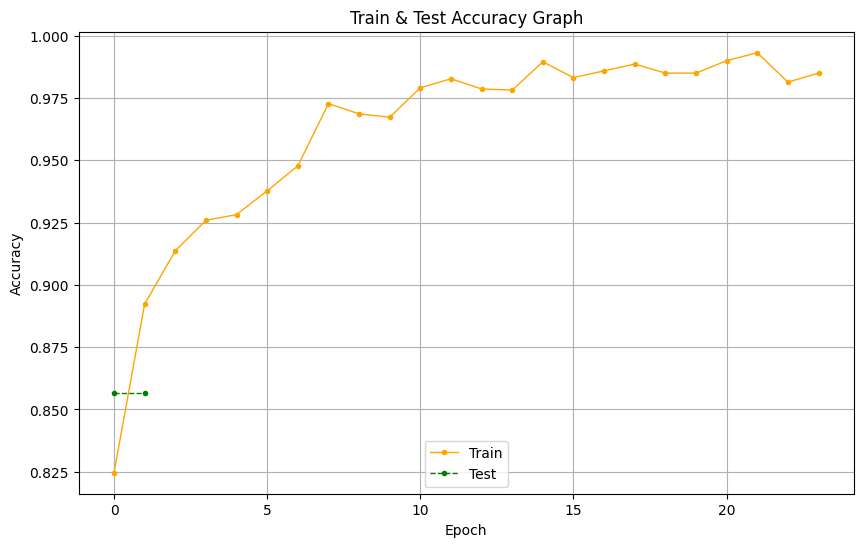

In [ ]:
import matplotlib.pyplot as plt

x_value = test_accuracy

def plot_accuracyGraph(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.history['accuracy'], color = 'orange', linewidth = 1, marker = '.')
  plt.plot([x_value,x_value], color='green', linestyle='--', label=f'x = {x_value}', linewidth = 1, marker = '.')
  plt.title('Train & Test Accuracy Graph')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.grid(True)
  plt.legend(['Train', 'Test'], loc='lower center')
  plt.show()

plot_accuracyGraph(history)